In [185]:
#IMPORTING ALL LIBRARIES & PACKAGES

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score


['.ipynb_checkpoints', 'data preprocessing.png', 'displots1.png', 'displots2.png', 'heart_disease_dataset.csv', 'heart_disease_predictor_model.ipynb', 'heart_disease_predictor_model.py', 'histogram of all features.png', 'import libraries.png', 'null checking.png', 'project report ML.docx', 'reading dataset.png', 'sns barplot1.png', 'sns barplot2.png', 'splitting dataset.png']


In [187]:
#READING DATASET

In [188]:
data=pd.read_csv("heart_disease_dataset.csv")

In [189]:
data.shape

(303, 14)

In [190]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [191]:
#checking if any value is containing null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [192]:
# Number of female = 138, Number of male = 165
data.groupby("target").size()

target
0    138
1    165
dtype: int64

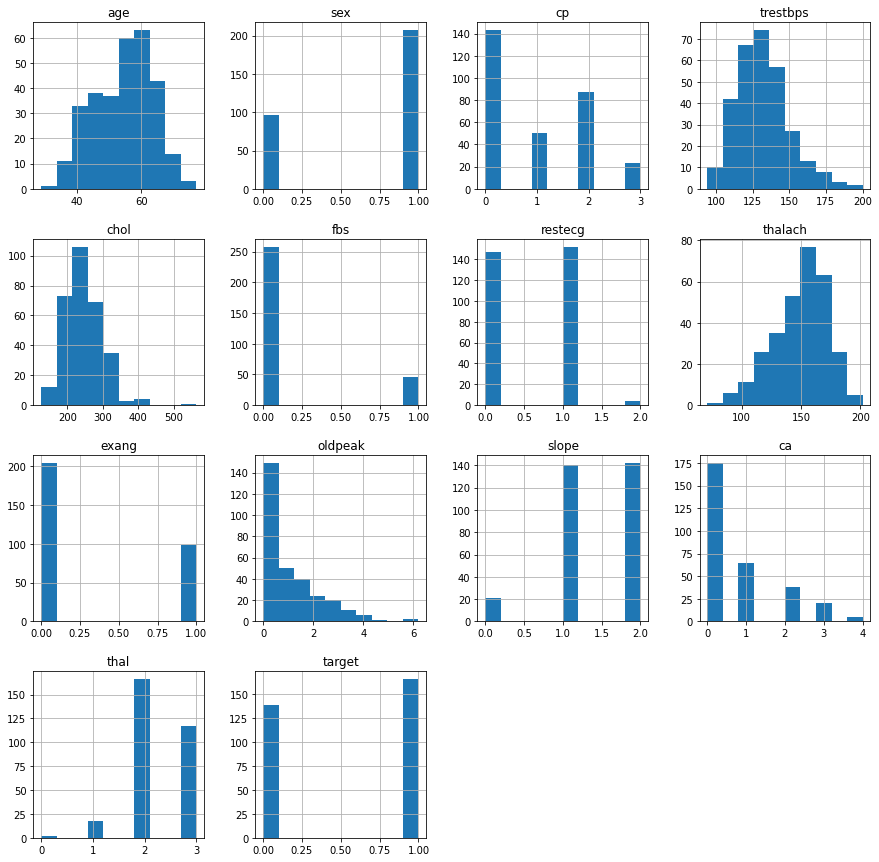

In [193]:
#Data exploration of all the features and printing as a histogram
data.hist(figsize=(15,15))
plt.show()

<AxesSubplot:xlabel='sex', ylabel='target'>

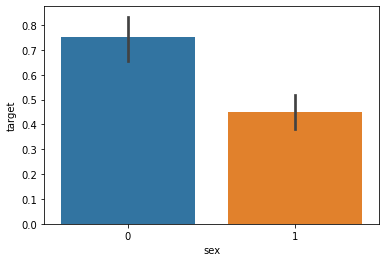

In [194]:
#Almost 70% female has heart disease & 45% male has heart disease
sns.barplot(data["sex"],data["target"])

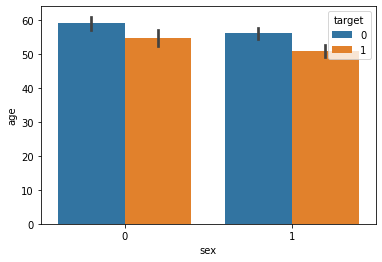

In [195]:
#Target is showing according to sex & age
sns.barplot(data["sex"],data["age"],hue=data["target"])
plt.show()

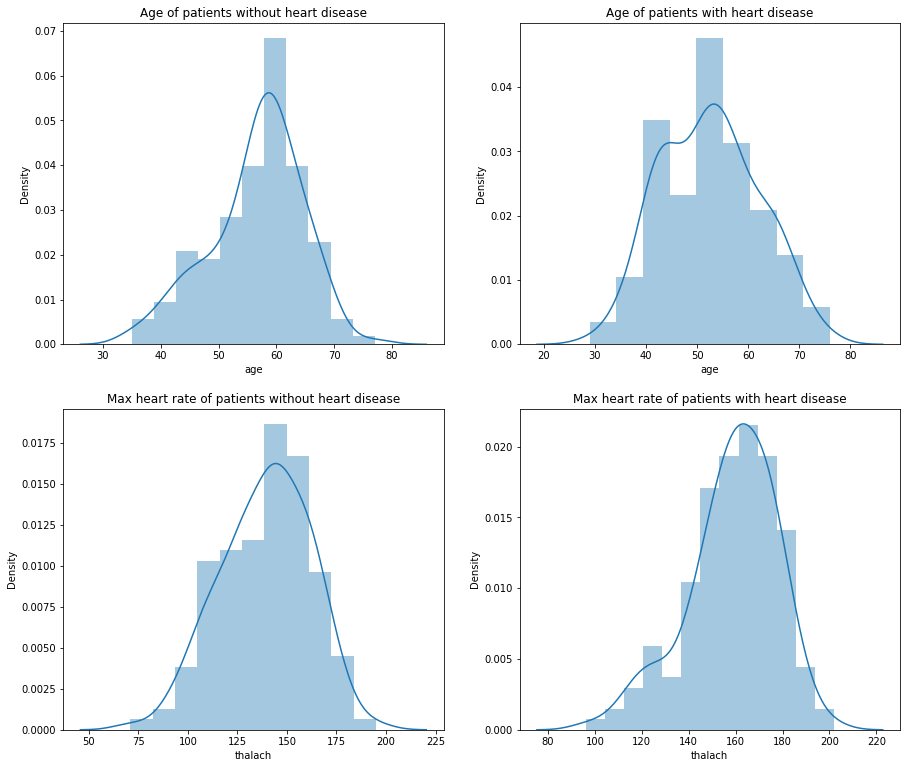

In [196]:
#creating four displots
plt.figure(figsize=(15,13))

plt.subplot(221)
sns.distplot(data[data['target']==0].age)
plt.title('Age of patients without heart disease')

plt.subplot(222)
sns.distplot(data[data['target']==1].age)
plt.title('Age of patients with heart disease')

plt.subplot(223)
sns.distplot(data[data['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')

plt.subplot(224)
sns.distplot(data[data['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')

plt.show()

In [197]:
#DATA PREPROCESSING

In [198]:
X,y=data.loc[:,:"thal"],data["target"]

In [199]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [200]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [201]:
#SPLITTING THE DATA SET INTO TRAIN & TEST

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [204]:
X_train.shape

(212, 13)

In [205]:
X_test.shape

(91, 13)

In [206]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [207]:
y_train.shape

(212,)

In [208]:
y_test.shape

(91,)

In [209]:
#IMPLEMENTING USING DECISION TREE CLASSIFIER ALGORITHM

In [210]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=10)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [211]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [212]:
prediction=dt.predict(X_test)

In [213]:
prediction

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [214]:
accuracy_dt=accuracy_score(y_test,prediction)*100

In [215]:
accuracy_dt

73.62637362637363

In [216]:
category=['No the patient is not having heart disease',
          'Yes the patient is having heart disease please consult with a heart specialist']

In [217]:
#CHECKING WITH CUSTOM DATA FOR DECISION TREE CLASSIFIER

In [218]:
custom_data=np.array([[41,0,1,130,204,0,0,172,0,1.4,2,0,2]])

In [219]:
custom_data_prediction_dt=dt.predict(custom_data)

In [220]:
int(custom_data_prediction_dt)

1

In [221]:
print(category[int(custom_data_prediction_dt)])

Yes the patient is having heart disease please consult with a heart specialist


In [222]:
#IMPLEMENTING USING KNN ALGORITHM

In [223]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [224]:
prediction_knn=knn.predict(X_test)

In [225]:
accuracy_knn=accuracy_score(y_test,prediction_knn)*100

In [226]:
accuracy_knn

67.03296703296702

In [227]:
#CHECKING WITH CUSTOM DATA FOR KNN ALGORITHM

In [228]:
custom_data=np.array([[41,0,1,130,204,0,0,172,0,1.4,2,0,2]])

In [229]:
custom_data_prediction_knn=knn.predict(custom_data)

In [230]:
int(custom_data_prediction_knn)

1

In [231]:
print(category[int(custom_data_prediction_knn)])

Yes the patient is having heart disease please consult with a heart specialist


In [232]:
#COMPARING BOTH ALGORITHMS

In [233]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn]

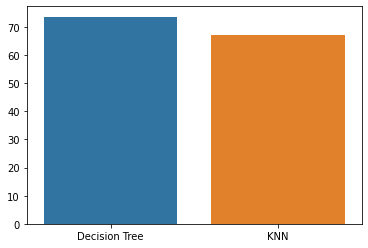

In [234]:
sns.barplot(algorithms,scores)
plt.show()

In [235]:
#END